## Data Exploration/Formatting/Splitting : LinkedIn

1. Loading datasets and concatenating it

In [1]:
import pandas as pd

In [2]:
#Loading the datasets
df_01_06_2020=pd.read_excel('Jan-2020 -Jun-2020.xlsx')
df_07_10_2020=pd.read_excel('Jul-2020 -Oct-2020.xlsx')
df_11_12_2020=pd.read_excel('Nov-2020-Dec-2020.xlsx')
df_01_06_2021=pd.read_excel('Jan-2021-Jun-2021.xlsx')
df_07_12_2021=pd.read_excel('Jul-2021-Dec-2021.xlsx')
df_01_06_2022=pd.read_excel('Linkedin Jan-Jun 2022.xls')
df_07_12_2022=pd.read_excel('Linkedin Jul-Dec 2022.xls')
df_01_06_2023=pd.read_excel('Jan-2023-Jun-2023.xlsx')



In [3]:
print(df_01_06_2020.shape)
print(df_07_10_2020.shape)
print(df_11_12_2020.shape)
print(df_01_06_2021.shape)
print(df_07_12_2021.shape)
print(df_01_06_2022.shape)
print(df_07_12_2022.shape)
print(df_01_06_2023.shape)

(3515, 31)
(7762, 31)
(7619, 32)
(11354, 31)
(4498, 31)
(9952, 31)
(12453, 31)
(8194, 31)


In [4]:
df = pd.concat([df_01_06_2020, 
                df_07_10_2020, 
                df_11_12_2020, 
                df_01_06_2021,
                df_07_12_2021,
                df_01_06_2022,
                df_07_12_2022,
                df_01_06_2023
                 ], ignore_index=True)
df.shape


(65347, 32)

In [5]:
df.columns

Index(['Start Date (in UTC)', 'Carousel Card', 'Account Name',
       'Campaign Group Name', 'Campaign Group ID', 'Campaign Name',
       'Campaign ID', 'Campaign Type', 'Ad Headline', 'Ad Line',
       'Creative Name', 'Ad ID', 'Total Spent', 'Impressions',
       'Card Impressions', 'Clicks', 'Card Clicks', 'Total Engagements',
       'Video Views', 'Video Views at 25%', 'Video Views at 50%',
       'Video Views at 75%', 'Video Completions', 'Shares', 'Comments',
       'Reactions', 'Follows', 'Campaign Objective', 'Link Clicks',
       'Conversions', 'Leads', 'Reach'],
      dtype='object')

In [6]:
df.to_csv('concatfirst.csv')

In [7]:
for col in ['Leads', 'Conversions', 'Clicks', 'Link Clicks']:
    df[col].fillna(0, inplace=True)

df['leads']=df['Leads']+df['Conversions']
df['clicks']=df['Clicks']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65347 entries, 0 to 65346
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Start Date (in UTC)  65347 non-null  object 
 1   Carousel Card        35212 non-null  float64
 2   Account Name         65347 non-null  object 
 3   Campaign Group Name  65347 non-null  object 
 4   Campaign Group ID    65347 non-null  int64  
 5   Campaign Name        65347 non-null  object 
 6   Campaign ID          65347 non-null  int64  
 7   Campaign Type        65347 non-null  object 
 8   Ad Headline          20585 non-null  object 
 9   Ad Line              0 non-null      float64
 10  Creative Name        65347 non-null  object 
 11  Ad ID                65347 non-null  int64  
 12  Total Spent          30135 non-null  object 
 13  Impressions          30135 non-null  float64
 14  Card Impressions     44649 non-null  float64
 15  Clicks               65347 non-null 

In [9]:
#Converting the Total spent column to a float column
df['Total Spent']= df['Total Spent'].astype('str')
df['spend_linkedin'] = df['Total Spent'].str.replace(',', '').astype(float)

#Creating the date column
df['date']=df['Start Date (in UTC)'].astype('datetime64[ns]')
df=df.drop(columns=['Start Date (in UTC)'])
df=df.sort_values(by='date')

df.to_csv('concatsorted.csv')



In [10]:
df.shape

(65347, 35)

In [11]:
# Identify carousel ads based on repeated Ad_ID and same Date values
carousel_ads = df[df.duplicated(['Ad ID', 'date'], keep=False)]

# Extract the first row of each carousel ad

overall_row_carousel = carousel_ads[carousel_ads['Carousel Card'].isna()]

# Filter non-carousel ads
non_carousel_ads = df[~df[['Ad ID', 'date']].isin(carousel_ads[['Ad ID', 'date']]).all(axis=1)]

# Combine carousel and non-carousel ads
df = pd.concat([overall_row_carousel, non_carousel_ads], ignore_index=True)

df.to_csv('df_unfaulty.csv')

df.shape

(30135, 35)

In [12]:
mask_1 = df['Impressions'] < df['clicks']
df= df[~mask_1]
mask_2 = df['Impressions'] < df['leads']
df= df[~mask_2]
df.reset_index(drop=True, inplace=True)
df.to_csv('df.csv')

In [13]:
df.shape

(22761, 35)

In [14]:
#Extracting the phase column
phase=[]

for objective in df['Campaign Objective']:
    if objective == 'Website visits':
        phase.append('Consideration')
    elif objective == 'Website conversions':
        phase.append('Decision')
    elif objective == 'Lead generation':
        phase.append('Decision')
    elif objective == 'Video views':
        phase.append('Awareness')
    elif objective == 'Brand awareness':
        phase.append('Awareness')
    else:
        phase.append(None)

df['phase']=phase

In [15]:
df['phase'].value_counts()

Consideration    12742
Awareness         6532
Decision          3487
Name: phase, dtype: int64

In [16]:
df['Leads']=df['Leads'] + df['Conversions']

Adding a campaign_model column and Country 

#Car model extraction
#model_campaign=[]

#for name in df['Campaign Group Name']:

    if 's-class' in name.lower() or 'sclass' in name.lower() or 's.class' in name.lower():
        model_campaign.append('Less Popular Models')
    elif 'gle' in name.lower():
        model_campaign.append('Less Popular Models')
    elif 'cla' in name.lower():
        model_campaign.append('CLA')
    elif 'gt' in name.lower():
        model_campaign.append('Less Popular Models')
    elif 'eqs' in name.lower():
        model_campaign.append('EQS')
    elif 'eqe' in name.lower():
        model_campaign.append('EQE')
    elif 'eqa' in name.lower():
       model_campaign.append('EQA')
    elif 'eqb' in name.lower():
       model_campaign.append('EQB')
    elif 'c-class' in name.lower() or 'cclass' in name.lower() or 'c.class' in name.lower():
        model_campaign.append('C-class')
    elif 'amgsl' in name.lower() in name.lower() or 'amg sl' in name.lower() or 'sl' in name.lower():
        model_campaign.append('AMG SL')
    elif 'e-class' in name.lower() or 'eclass' in name.lower() or 'e.class' in name.lower():
        model_campaign.append('E-class')
    elif 'glb' in name.lower():
        model_campaign.append('Less Popular Models')
    elif 'gls' in name.lower():
        model_campaign.append('Less Popular Models')
    else:
        model_campaign.append('Other')
    
df['model_campaign'] = model_campaign

    
    


#Market extraction
country=[]

for campaign in df['Campaign Name']:
    if 'auh' in campaign.lower():
        country.append('Abu Dhabi')
    elif 'dxb' in campaign.lower() or 'dubai' in campaign.lower():
        country.append('Dubai')
    elif 'bhr' in campaign.lower():
        country.append('Bahrein')
    elif 'kwt' in campaign.lower():
        country.append('Kuwait')
    elif 'sau' in campaign.lower() or 'ksa' in campaign.lower():
        country.append('Saudia Aribia')
    elif 'gcc' in campaign.lower():
        country.append('Other')
    elif 'omn' in campaign.lower():
        country.append('Oman')
    elif 'qat' in campaign.lower():
        country.append('Qatar')
    elif 'jor' in campaign.lower():
        country.append('Other')
    else:
        country.append('Other')
    
df['country']= country

df['country'].value_counts()



    
    
    

## Simple plotting of the data

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns

1. Spend Analysis

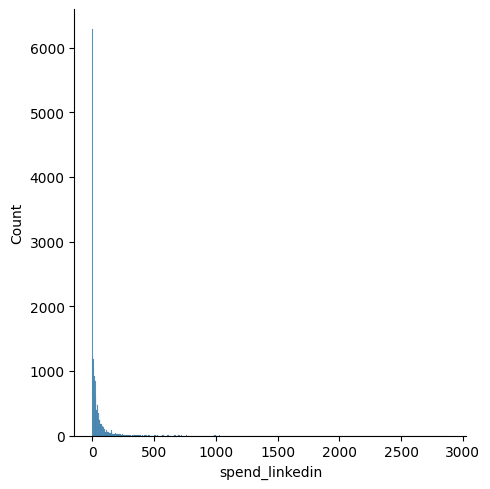

In [18]:
sns.displot(x=df['spend_linkedin'])

1.1. Spend Analysis according to Campaign objective

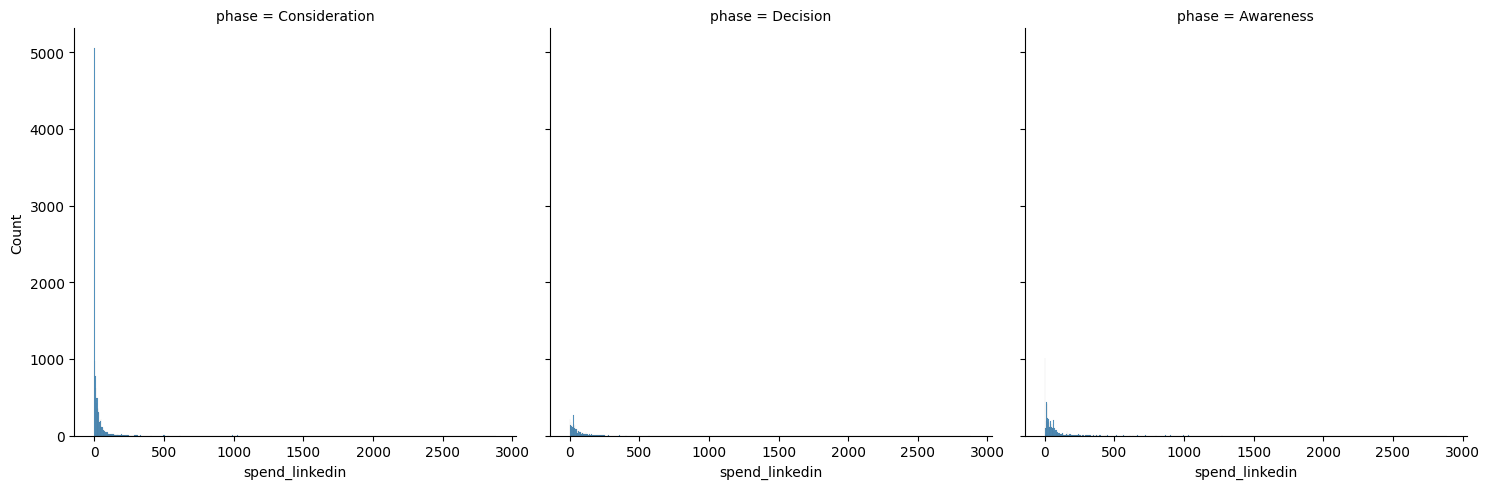

In [19]:
sns.displot(x=df['spend_linkedin'], col=df['phase'])


sns.displot(x=df['spend_linkedin'], col=df['country'])

1.2. Spend according to campaign models

sns.displot(x=df['spend_linkedin'], col=df['model_campaign'])

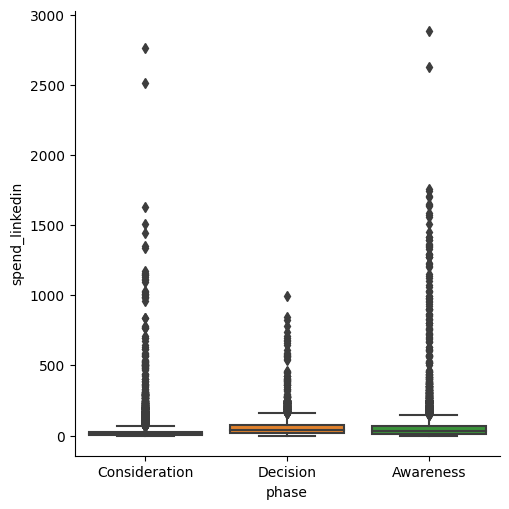

In [20]:
sns.catplot(x='phase', y='spend_linkedin',data=df, kind='box')

2. Impressions

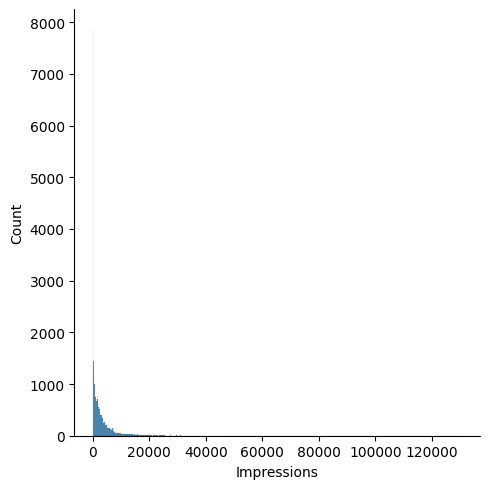

In [21]:
sns.displot(x=df['Impressions'])

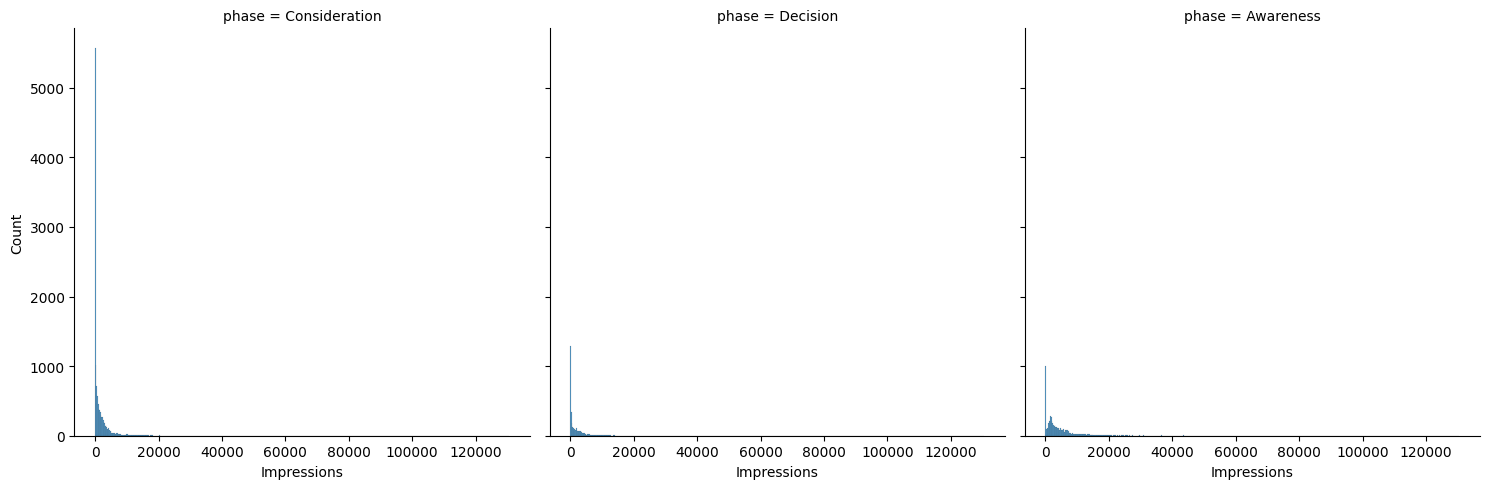

In [22]:
sns.displot(x=df['Impressions'], col=df['phase'])

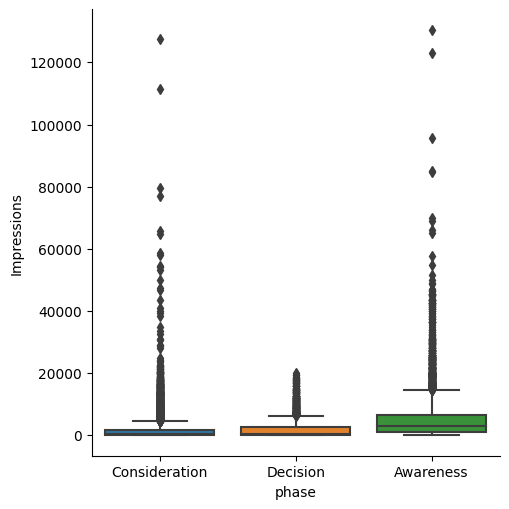

In [23]:
sns.catplot(x='phase', y='Impressions',data=df, kind='box')

3. Clicks

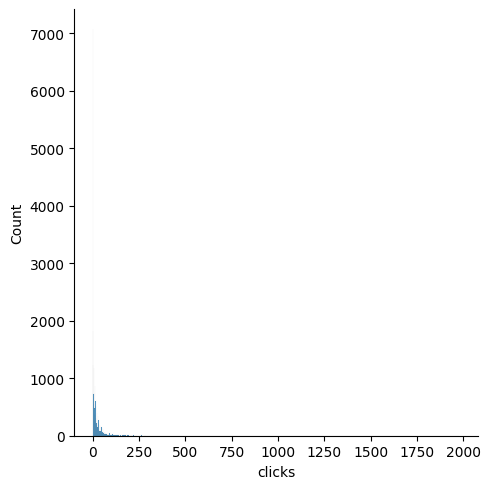

In [24]:
sns.displot(x=df['clicks'])

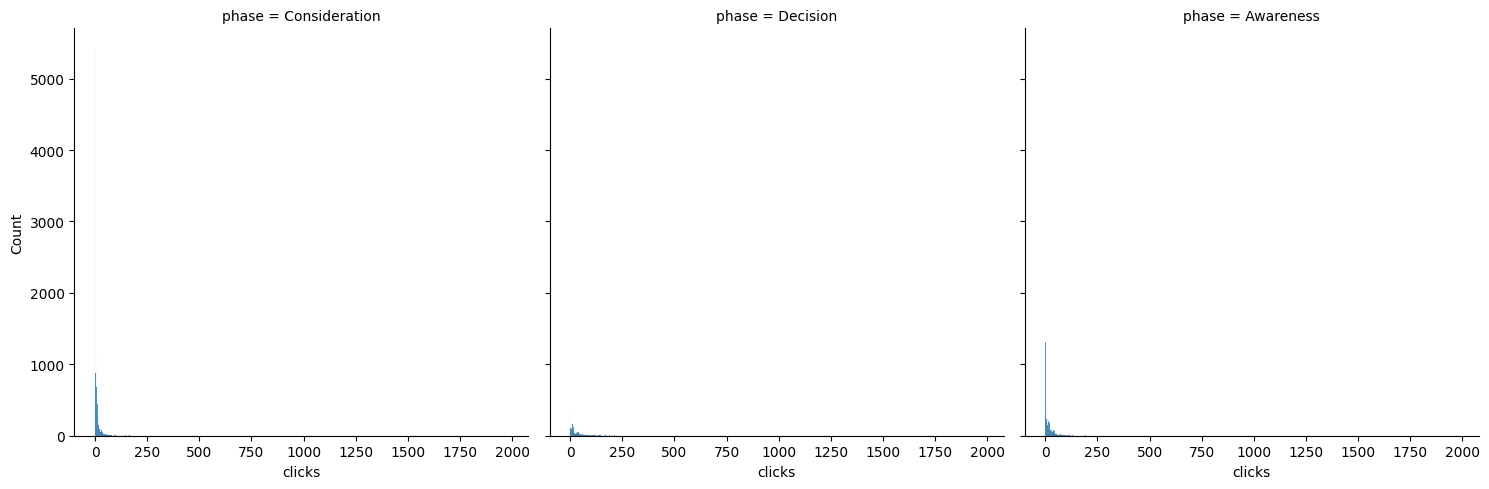

In [25]:
sns.displot(x=df['clicks'], col=df['phase'])

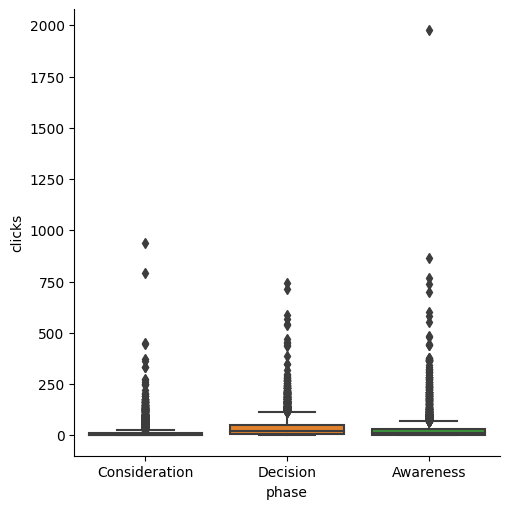

In [26]:
sns.catplot(x='phase', y='clicks',data=df, kind='box')

4. Leads

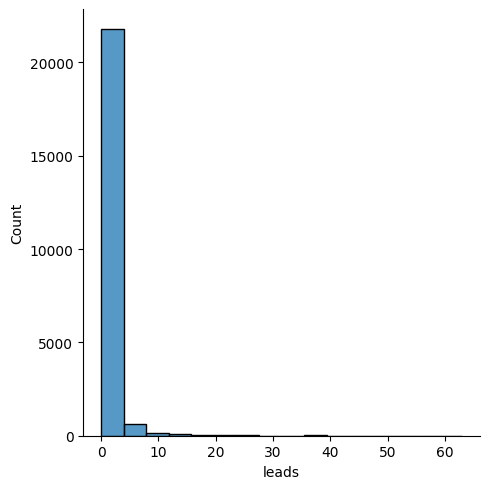

In [27]:
sns.displot(x=df['leads'])

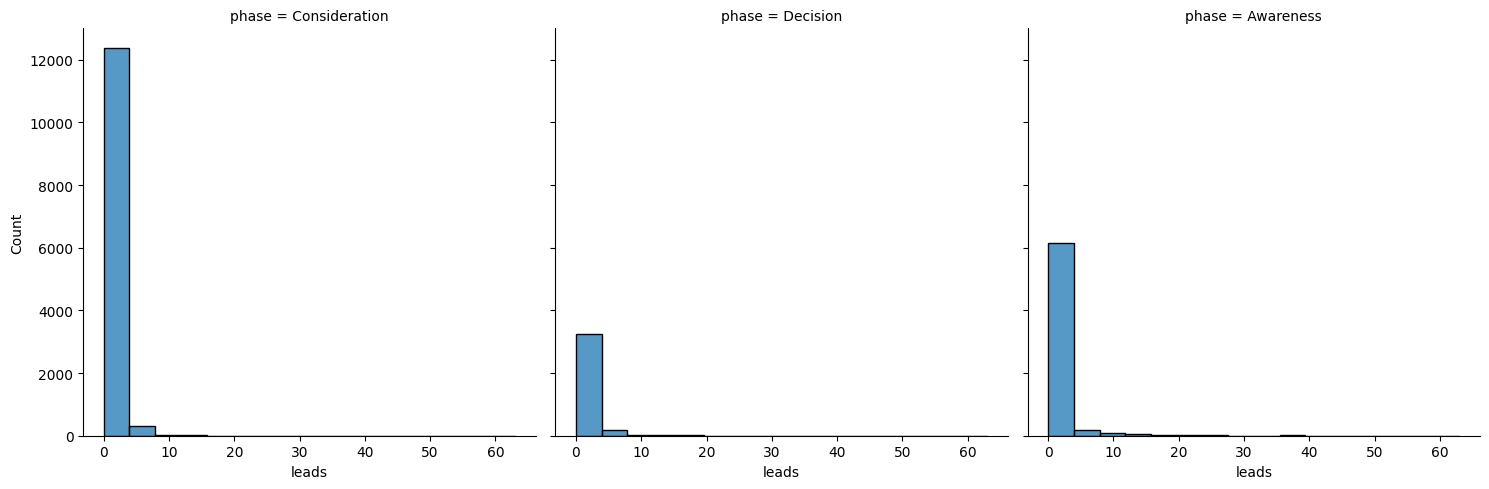

In [28]:
sns.displot(x=df['leads'], col=df['phase'])

Awareness phase campaigns seem to perform slightly better when iot comes to conversions generation

## Scatterplots: Spend v Performance metric

1. Spend vs Impressions

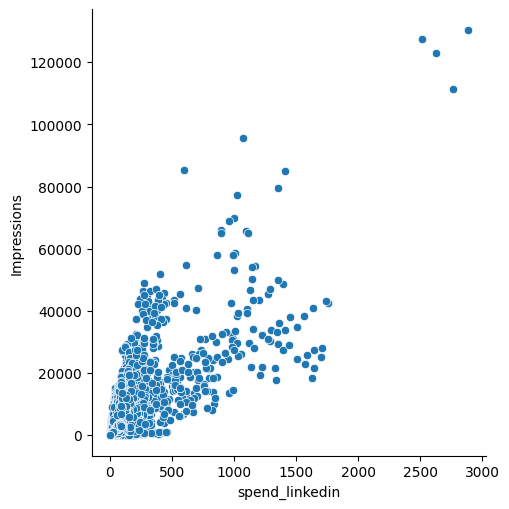

In [29]:
sns.relplot(x='spend_linkedin', y='Impressions', data=df, kind='scatter')

As we can observe, there is quite a strong positive correlation between spend and impressions, meaning: the more you spend on adverts, the higher the impressions you will get! This is an encouraging sign that money spent on linkedin does actually translate to better ad performance 

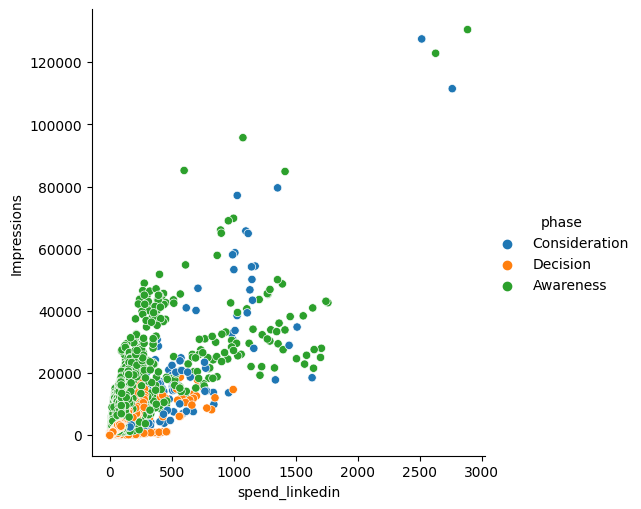

In [30]:
sns.relplot(x='spend_linkedin', y='Impressions', hue='phase', data=df, kind='scatter')

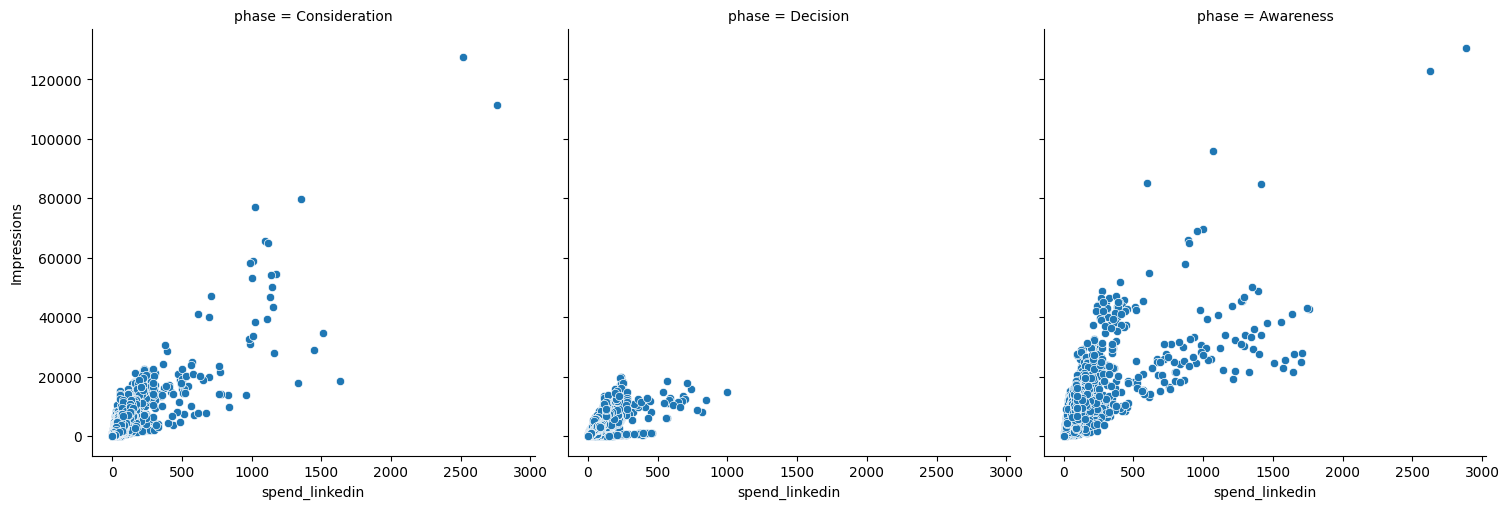

In [31]:
sns.relplot(x='spend_linkedin', y='Impressions', col='phase', data=df, kind='scatter')

As we can observe, there is a stronger positive correlation (with a higher slope) between spend and impressions for Awareness campaigns. For decision and consideration, the positive correlation is weaker and the slope is flatter

2. Spend vs clicks

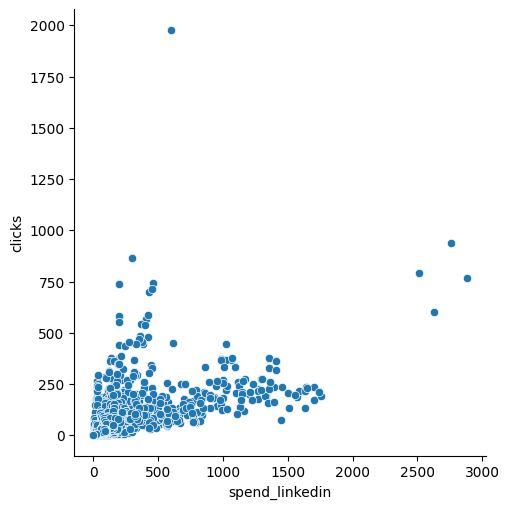

In [32]:
sns.relplot(x='spend_linkedin', y='clicks', data=df, kind='scatter')

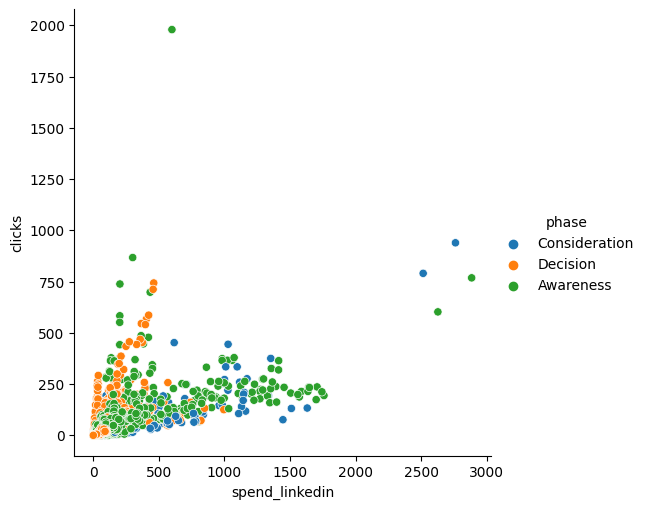

In [33]:
sns.relplot(x='spend_linkedin', y='clicks', hue='phase', data=df, kind='scatter')

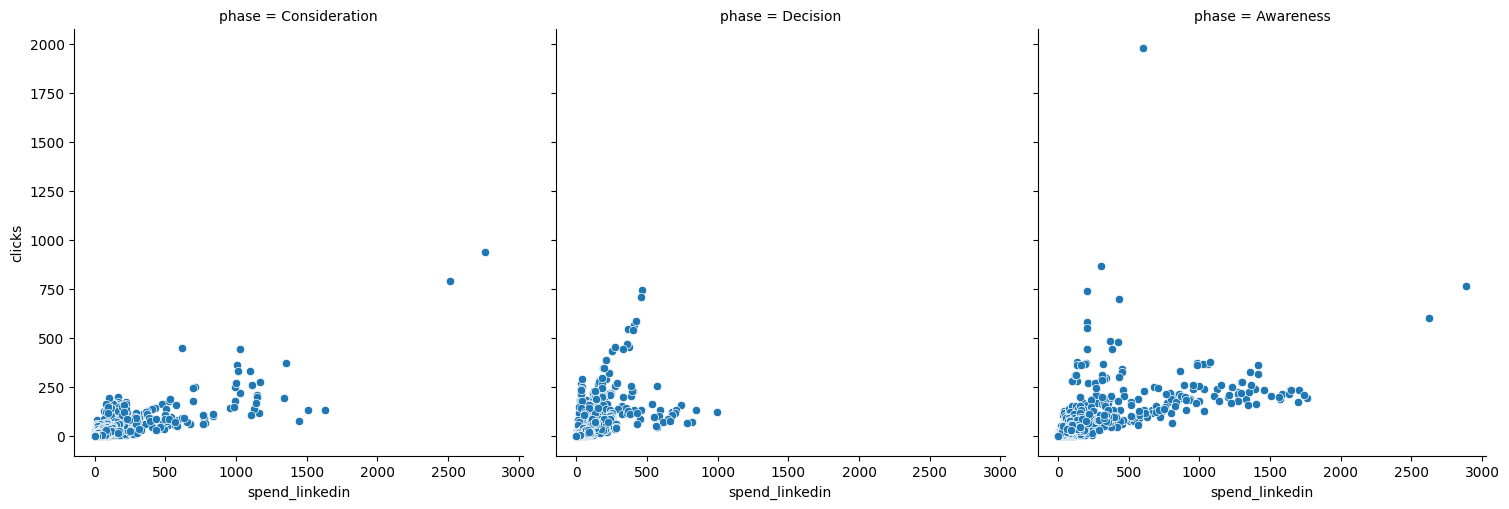

In [34]:
sns.relplot(x='spend_linkedin', y='clicks', col='phase', data=df, kind='scatter')

Similarly, there is also a strong positive correlation between spend and impressions, meaning: the more you spend on adverts, the higher the clicks you will get! This is another encouraging sign that money spent on linkedin does actually translate to better ad performance 

3. Spend vs leads

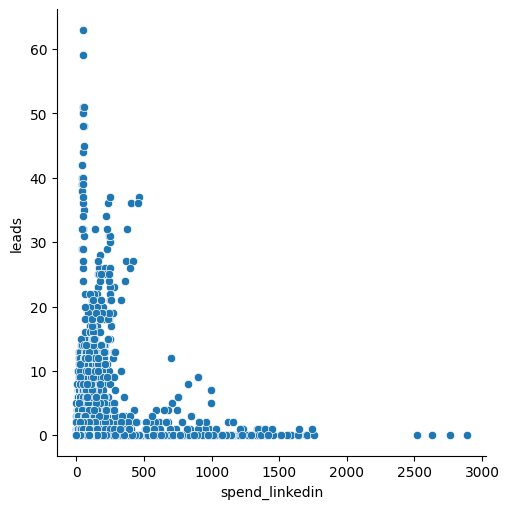

In [35]:
sns.relplot(x='spend_linkedin', y='leads', data=df, kind='scatter')

Hmmm, here we see a quite different story when it comes to the correlation between leads and spend... It seems as though the increase in ad spending does not tend to influence leads. This might be a sign that increasing spend in Linkedin ads in hopes of increasing lead generation might be useless

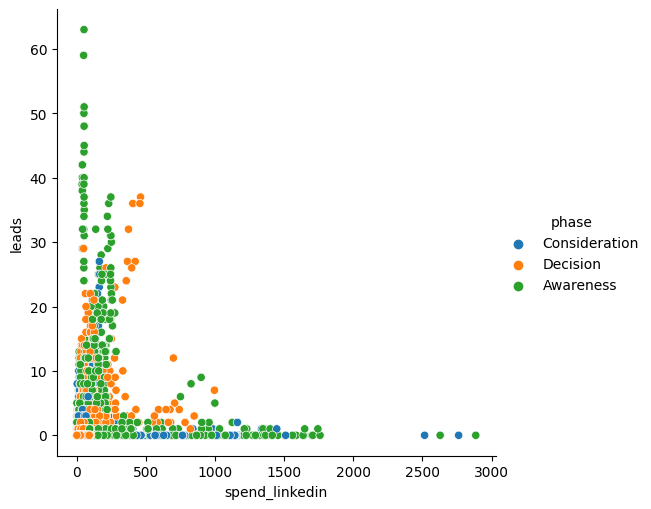

In [36]:
sns.relplot(x='spend_linkedin', y='leads', hue='phase', data=df, kind='scatter')


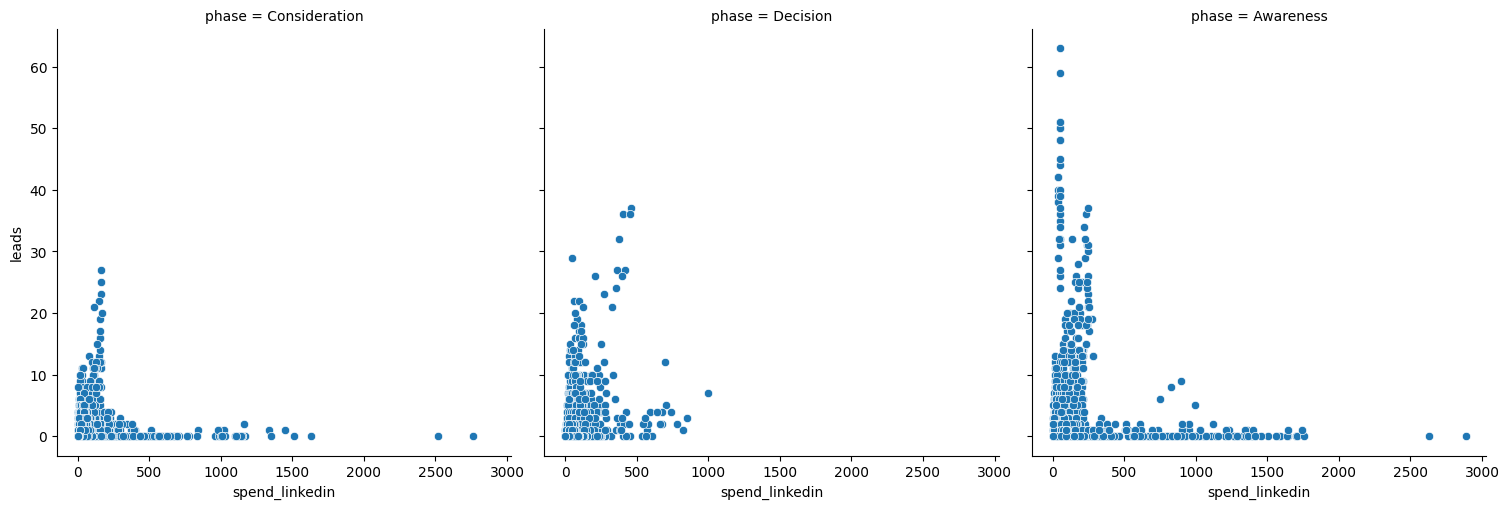

In [37]:
sns.relplot(x='spend_linkedin', y='leads', col='phase', data=df, kind='scatter')


Suprisingly enough, there is no correlation between spend and conversions

The only lead does come from a decision campaign! However, there is no sign that this is due to decision campaign effectiveness...

## Correlation matrix

In [38]:
phases= pd.get_dummies(df['phase'], prefix='phase')
df= pd.concat([df, phases], axis=1)
df



,Carousel Card,Account Name,Campaign Group Name,Campaign Group ID,Campaign Name,Campaign ID,Campaign Type,Ad Headline,Ad Line,Creative Name,...,Leads,Reach,leads,clicks,spend_linkedin,date,phase,phase_Awareness,phase_Consideration,phase_Decision
0,NaN,Mercedes-Benz Cars_Commercial,GLE SUV,606561046,DXB-GLE_Traffic_Dec-2019-Rerun,146334696,Sponsored Update,NaN,NaN,DXB_Safety,...,0.0,NaN,0.0,0.0,0.00,2020-01-01,Consideration,0,1,0
1,NaN,Mercedes-Benz Cars_Commercial,A Class Sedan _GD Tactical,606459776,Consideration_KSA_A-Class_Rerun-additional-budget,146167946,Sponsored Update,NaN,NaN,KSA,...,0.0,NaN,0.0,0.0,0.00,2020-01-01,Consideration,0,1,0
2,NaN,Mercedes-Benz Cars_Commercial,GLE SUV,606561046,KWT-GLE_Traffic_Dec-2019-Rerun,146334526,Sponsored Update,NaN,NaN,KWT_MUBX,...,0.0,NaN,0.0,0.0,0.00,2020-01-01,Consideration,0,1,0
3,NaN,Mercedes-Benz Cars_Commercial,A-Class GD Tactical,607537346,QAT_Traffic-Dec-2019,146359286,Sponsored Update,NaN,NaN,Carousel-1,...,0.0,NaN,0.0,0.0,0.00,2020-01-01,Consideration,0,1,0
4,NaN,Mercedes-Benz Cars_Commercial,GLE SUV,606561046,KWT-GLE_Traffic_Dec-2019-Rerun,146334526,Sponsored Update,NaN,NaN,KWT_Safety,...,0.0,NaN,0.0,0.0,0.00,2020-01-01,Consideration,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22756,NaN,Mercedes-Benz Cars_Commercial,C.P.T.X243_PAD_RO_MM_EQRange-March2023-MBCME_C...,633350614,LinkedIn_PRCH_LEADS_CONVR_LIFE_STD-SUV-EQS_PLA...,214017194,Sponsored Update,Be the first to the future. Experience the new...,NaN,Static_Front_AUH,...,0.0,NaN,0.0,1.0,14.30,2023-06-28,Decision,0,0,1
22757,NaN,Mercedes-Benz Cars_Commercial,C.P.T.X243_PAD_RO_MM_EQRange-March2023-MBCME_C...,633350614,LinkedIn_PRCH_LEADS_CONVR_LIFE_STD-SUV-EQS_PLA...,214017324,Sponsored Update,Be the first to the future. Experience the ne...,NaN,VIDEO_Front_AUH,...,0.0,NaN,0.0,5.0,24.87,2023-06-28,Decision,0,0,1
22758,NaN,Mercedes-Benz Cars_Commercial,C.P.T.X243_PAD_RO_MM_EQRange-March2023-MBCME_C...,633350614,LinkedIn_PRCH_LEADS_CONVR_LIFE_STD-SUV-EQS_PLA...,214017194,Sponsored Update,Be the first to the future. Experience the new...,NaN,Static_Back_AUH,...,0.0,NaN,0.0,19.0,89.55,2023-06-28,Decision,0,0,1
22759,NaN,Mercedes-Benz Cars_Commercial,C.P.T.X243_PAD_RO_MM_EQRange-March2023-MBCME_C...,633350614,LinkedIn_PRCH_LEADS_CONVR_LIFE_STD-SUV-EQS_PLA...,214017194,Sponsored Update,Be the first to the future. Experience the new...,NaN,Static_Front_AUH,...,0.0,NaN,0.0,0.0,0.00,2023-06-29,Decision,0,0,1


In [39]:
df_corr=df[['spend_linkedin', 'phase_Awareness', 'phase_Consideration', 'phase_Decision', 'date', 'leads', 'clicks', 'Impressions']]

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_64112/515973839.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_corr.corr()


NameError: name 'k' is not defined

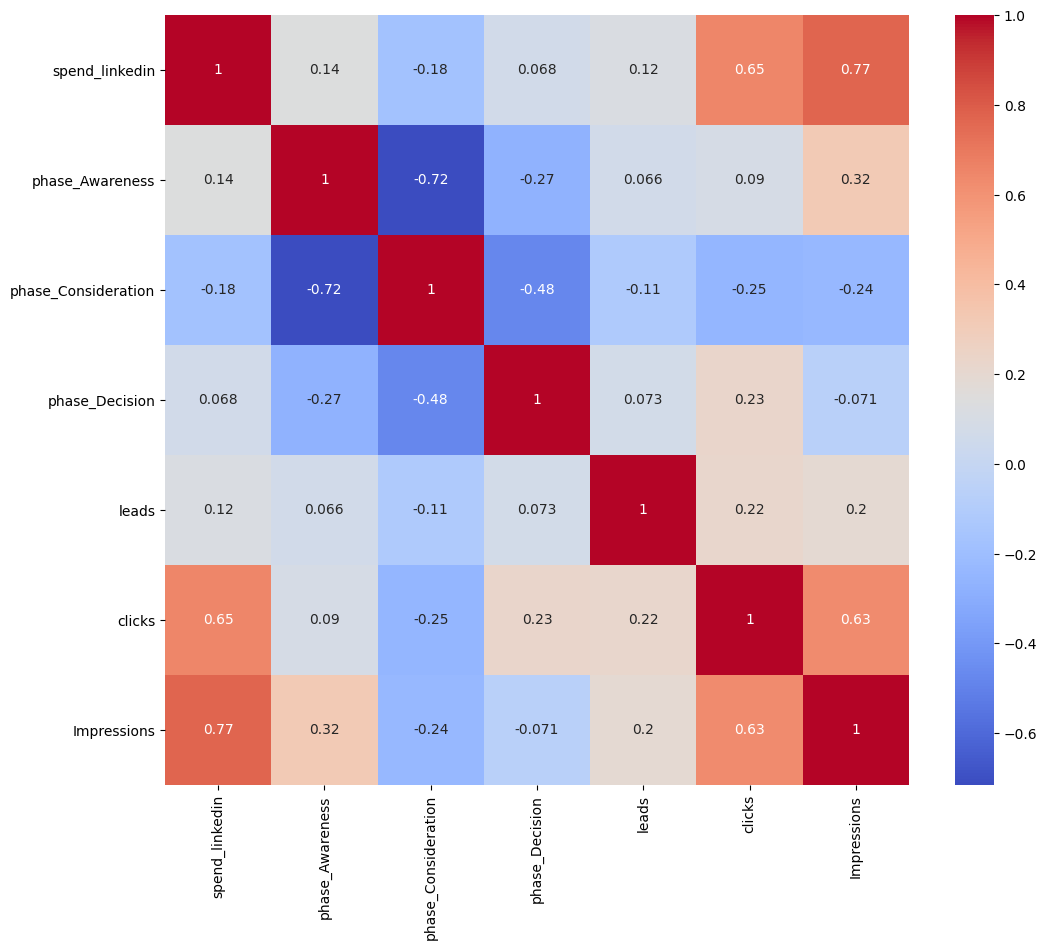

In [40]:

correlation_matrix = df_corr.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (Top {} Features)'.format(k))
plt.show()
#High correlations: VIP, CryoSleep, Destination

The correlation confirms our suspcions that increasing spending in Linkedin ads definitely leads to an increase in their performance in the Awareness and Consideration phase. However, it is too early to decide whether an increase in investment will lead to better performance, as the Linkedin Marketing channel might already be highly saturated! 

## Explore weekly information to uncover potential seasonalities

In [41]:
# Group the data by week and calculate the sum of the ad metrics
df_cols_weekly = df_corr.groupby(pd.Grouper(key='date', freq='W-SUN')).sum()

# Reset the index to get the 'week' column
df_cols_weekly = df_cols_weekly.reset_index()

# Rename the 'date' column to 'week'
df_cols_weekly = df_cols_weekly.rename(columns={'date': 'week_end'})

# Add a 'week_number' column ranging from 1 to 52
df_cols_weekly['week_number'] = df_cols_weekly['week_end'].dt.week

# Display the transformed weekly dataset
df_cols_weekly

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_64112/1519266421.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_cols_weekly['week_number'] = df_cols_weekly['week_end'].dt.week


,week_end,spend_linkedin,phase_Awareness,phase_Consideration,phase_Decision,leads,clicks,Impressions,week_number
0,2020-01-05,0.00,1,86,4,0.0,0.0,0.0,1
1,2020-01-12,0.00,0,64,3,0.0,0.0,0.0,2
2,2020-01-19,0.00,1,12,3,0.0,0.0,0.0,3
3,2020-01-26,0.00,0,5,1,0.0,0.0,0.0,4
4,2020-02-02,0.00,0,7,2,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...
178,2023-06-04,3249.62,26,6,0,3.0,1416.0,351169.0,22
179,2023-06-11,820.02,1,33,0,0.0,324.0,58759.0,23
180,2023-06-18,5192.37,0,126,24,0.0,1729.0,338320.0,24
181,2023-06-25,5170.27,0,126,28,0.0,1588.0,328442.0,25


1. Spend/Clicks/Leads/Conversions/Impressions according to the period of the year: weekly and daily

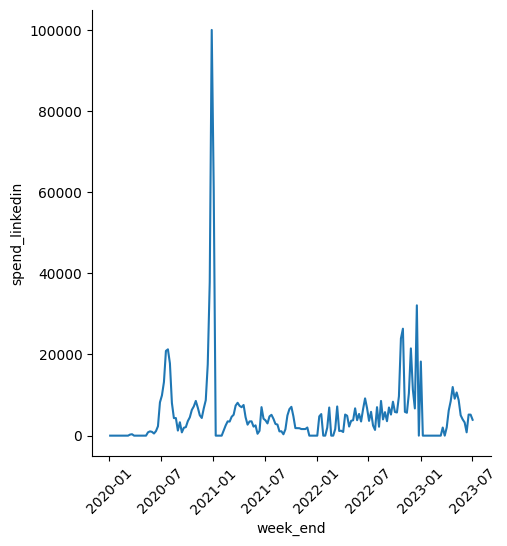

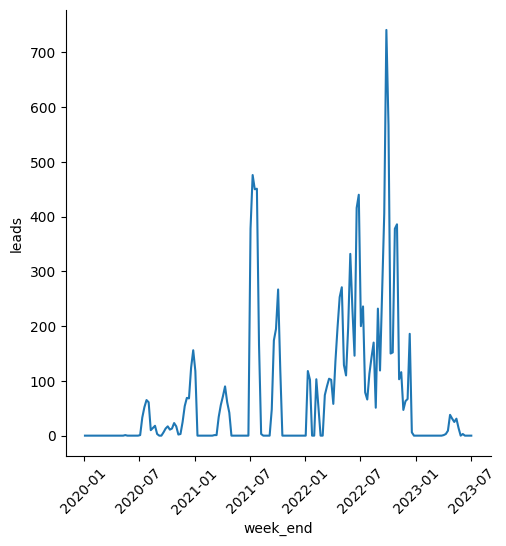

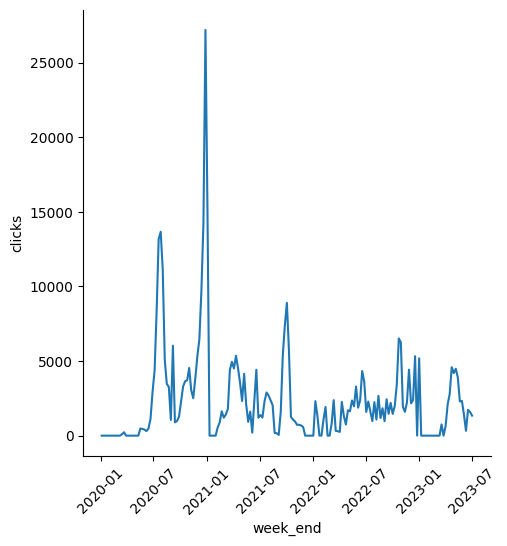

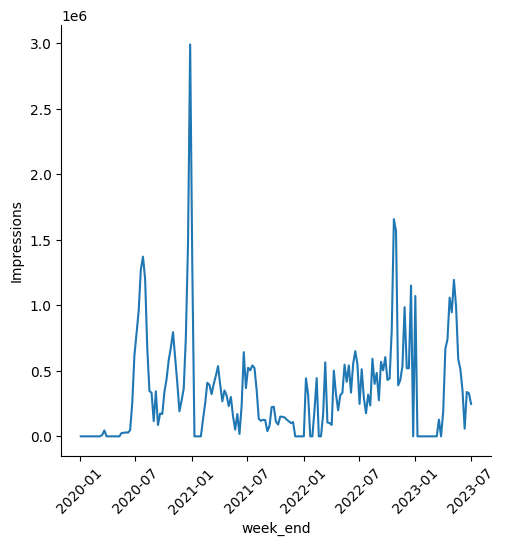

In [42]:
columns=['spend_linkedin', 'leads', 'clicks', 'Impressions']

for c in columns:
    sns.relplot(x='week_end', y=c, data=df_cols_weekly, kind='line')
    plt.xticks(rotation=45)
    plt.show()


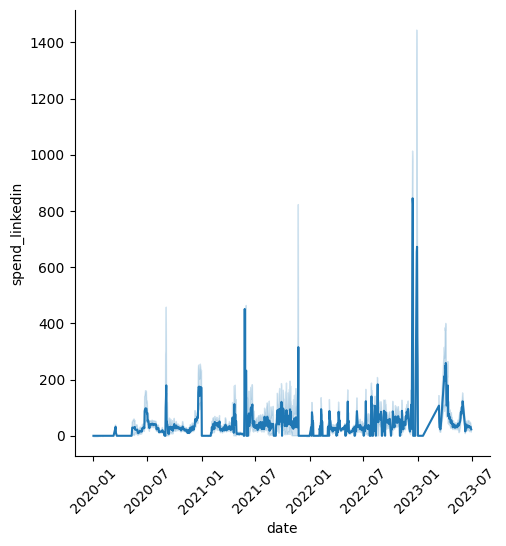

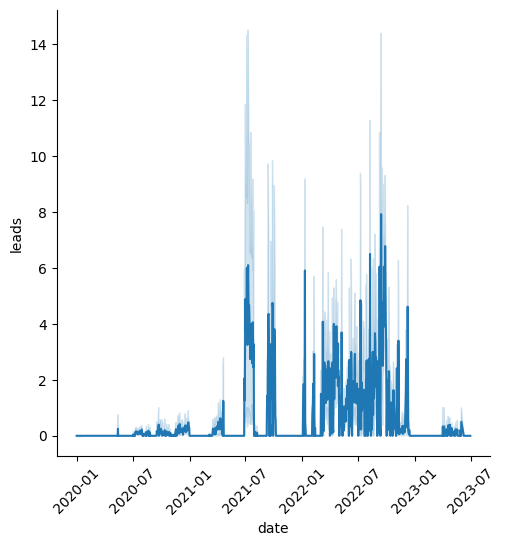

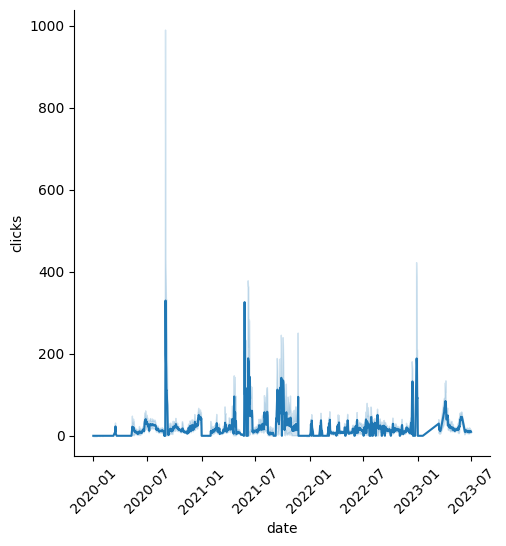

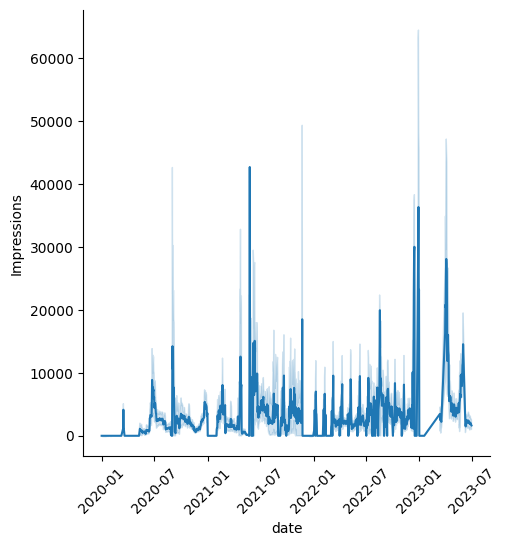

In [43]:
columns=['spend_linkedin', 'leads', 'clicks', 'Impressions']

for c in columns:
    sns.relplot(x='date', y=c, data=df, kind='line')
    plt.xticks(rotation=45)
    plt.show()

2. Spend/Clicks/Leads/Conversions/Impressions according to the period of the year: weekly and daily according to campaign phase

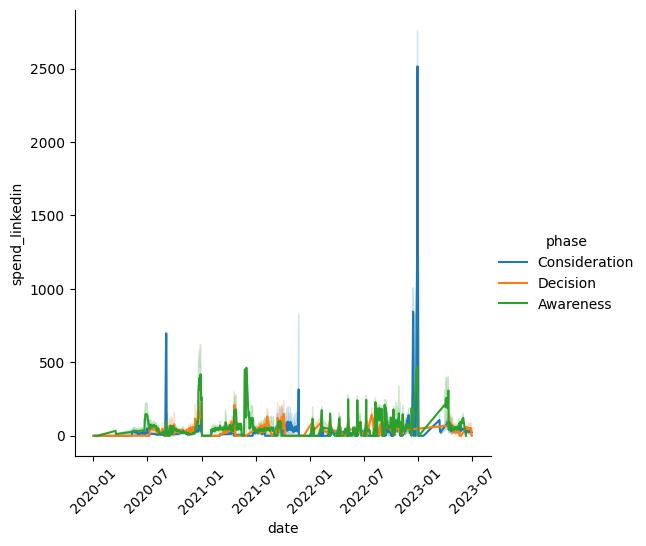

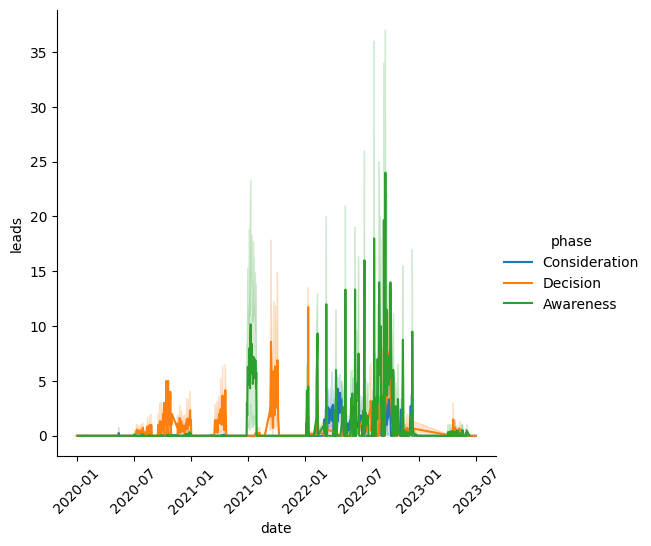

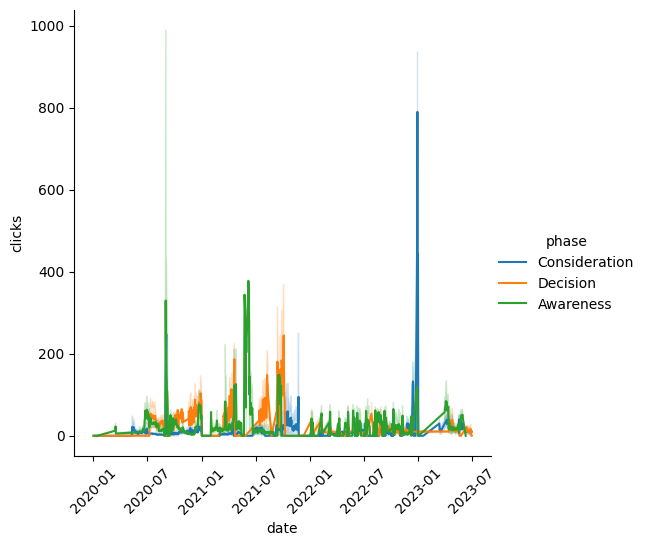

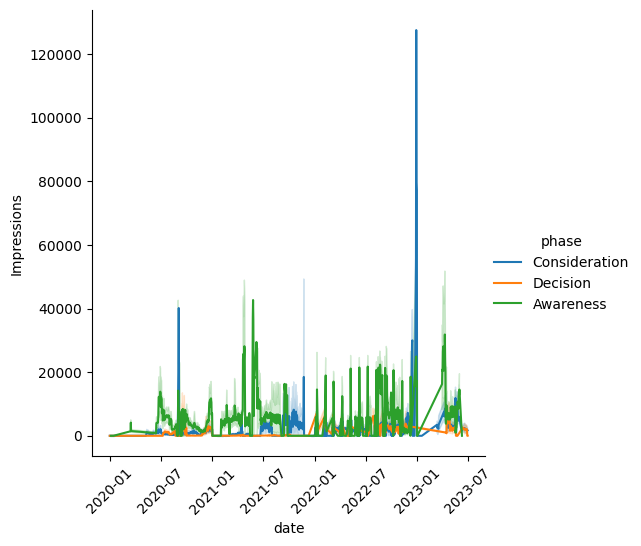

In [44]:
columns=['spend_linkedin', 'leads', 'clicks', 'Impressions']

for c in columns:
    sns.relplot(x='date', y=c, data=df, hue='phase', kind='line')
    plt.xticks(rotation=45)
    plt.show()

 The shaded region represents the confidence interval for the line plot.
The confidence interval is a range of values within which the true values are likely to fall with a certain level of confidence. In the context of a line plot, the confidence interval is typically used to indicate the uncertainty or variability in the data.
The shaded area around the line is created using a technique called bootstrapping. Seaborn estimates the confidence interval for each data point on the line by resampling the data and creating multiple line plots. The shaded region represents the range of values that contain a certain percentage of these resampled lines, usually 95% by default.
The darker colored line represents the central tendency or the average trend of the data points, while the shaded area around it gives you a sense of the uncertainty in the trend. If the shaded region is narrow, it indicates low variability, and if it is wide, it suggests higher variability or uncertainty.
This visualization is useful for understanding the reliability of the trend depicted by the line. It shows you not only the average trend but also the potential fluctuations or variations that might occur in the data.
If you want to remove the shaded area and only plot the line without the confidence interval, you can use the ci=None parameter

## Saving the necessary datasets to build the MMM 

In [45]:
df_final=df_cols_weekly[['spend_linkedin', 'leads', 'clicks', 'Impressions', 'week_end']]
df_final = df_final.rename(columns={'leads':'leads_linkedin', 'clicks': 'clicks_linkedin', 'Impressions': 'impressions_linkedin'})
df_final.to_csv('df_final_linkedin_superclean.csv')